In [1]:
# Step 1. Import Tensorflow and other helper libraries

# make sure tensorflow is installed; uncomment the line before if you need to
# pip install tensorflow

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models  #this is a new dependency!

From https://www.cs.toronto.edu/~kriz/cifar.html:
"The CIFAR-10 dataset consists of 60000 color images in 10 classes, with 6000 images per class.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks."

In [2]:
# Step 2. Load the CIFAR-10 data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
# Step 3. Pre-process and Explore the data

# Pre-process the data: convert pixel intensities to double values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Write code to check the data has the correct shape/dimension
# Insert your code below

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
# Step 4. Build the tf.keras.Sequential model by stacking layers.

# A. Create an "empty" sequential model and then add layers, one by one
# B. Add a Conv2D layer with the following characteristics:
#      - 32 output filters
#      - each of size 5 by 5
#      - use the Rectified Linear Unit as a non-linear activation function
#      - no padding
#      - the input shape is the same as the size of each of the images in the data set
# C. Add a maxpooling layer with the following characteristics:
#      - pool size is 2 by 2
#      - stride is 1
#      - no padding

# Don't add any flatten or fulley connected layers at the end!

# Insert your code below:

model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), activation='relu', padding = 'valid', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))



In [5]:
# Once a model is "built", you can call its summary() method to display its contents:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Step 5. Add more layers.

# A. Add a Conv2D layer with the following characteristics:
#      - 32 output filters
#      - each of size 3 by 3
#      - use the Rectified Linear Unit as a non-linear activation function
#      - no padding
#      - the input shape is the size of the output shape from the last maxpooling layer
# B. Add a maxpooling layer with the following characteristics:
#      - pool size is 2 by 2
#      - stride is 2
#      - no padding

# Don't add any flatten or fulley connected layers at the end!

# Insert your code below:

model.add(layers.Conv2D(32,(3,3), activation='relu', padding = 'valid', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2,2), strides= 2))




In [7]:
# Once a model is "built", you can call its summary() method to display its contents:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
Total params: 11,680
Trainable params: 11,680
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Adding one more convolutional layer, one flatten layer and two dense layers

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Dense(10))# last layer should be the size of the output
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1

In [9]:
# For each example the model returns a vector of "logits" or "log-odds" scores, one for each class.
# pass 1 training data image to the model and convert the predictions into a numpy array
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[-0.04079942,  0.08051644,  0.01024406,  0.1438045 , -0.07858074,
        -0.03500499,  0.06414972, -0.14132339,  0.08691671, -0.02614711]],
      dtype=float32)

In [10]:
# Use the tf.nn.softmax function to convert these logits into "probabilities" for each class:
tf.nn.softmax(predictions).numpy()


array([[0.09506756, 0.10732951, 0.10004612, 0.11434174, 0.09154278,
        0.09562002, 0.10558718, 0.08597562, 0.10801865, 0.09647077]],
      dtype=float32)

In [11]:
# Choose an optimizer and loss function for training

# Deep learning neural networks are trained using the stochastic gradient descent optimization 
# algorithm. As part of the optimization algorithm, the error for the current state of the 
# model must be estimated repeatedly. This requires the choice of an error function, 
# conventionally called a loss function, that can be used to estimate the loss of the model so 
# that the weights can be updated to reduce the loss on the next evaluation.

# The losses.SparseCategoricalCrossentropy loss takes a vector of logits and a True index and 
# returns a scalar loss for each example.

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# This loss is equal to the negative log probability of the true class: It is zero if the model 
# is sure of the correct class. This untrained model gives probabilities close to random
# (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.

loss_fn(y_train[:1], predictions).numpy()

2.2482183

In [12]:
# Step 6: Ready to compile! 
# optimizer parameter = 'adam'. Other optimizer options here: 
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# loss = the name of the loss function
# Typically you will use metrics=['accuracy']
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

# Task: call the model.fit method to train the model for 10 iterations

# Insert your code below:

history = model.fit(x_train, y_train, epochs = 10, validation_data= (x_test, y_test))



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 309s 6ms/sample - loss: 1.4891 - accuracy: 0.4599 - val_loss: 1.2536 - val_accuracy: 0.5502
Epoch 2/10
50000/50000 [==============================] - 302s 6ms/sample - loss: 1.1011 - accuracy: 0.6119 - val_loss: 1.1050 - val_accuracy: 0.6155
Epoch 4/10
50000/50000 [==============================] - 303s 6ms/sample - loss: 1.0254 - accuracy: 0.6368 - val_loss: 1.0817 - val_accuracy: 0.6190
Epoch 5/10
50000/50000 [==============================] - 303s 6ms/sample - loss: 0.9643 - accuracy: 0.6603 - val_loss: 1.0814 - val_accuracy: 0.6305
Epoch 6/10
50000/50000 [==============================] - 303s 6ms/sample - loss: 0.9180 - accuracy: 0.6786 - val_loss: 1.0215 - val_accuracy: 0.6473
Epoch 7/10
50000/50000 [==============================] - 306s 6ms/sample - loss: 0.8825 - accuracy: 0.6899 - val_loss: 0.9929 - val_accuracy: 0.6616
Epoch 8/10
50000/50000 [==========================

In [13]:
# Step 7a. Evaluate the model: compare how the model performs on the test dataset

# The Model.evaluate method checks the models performance, usually on a "Validation-set" 
# or "Test-set".

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 16s - loss: 1.0213 - accuracy: 0.6594

Test accuracy: 0.6594


10000/10000 - 16s - loss: 1.0213 - accuracy: 0.6594


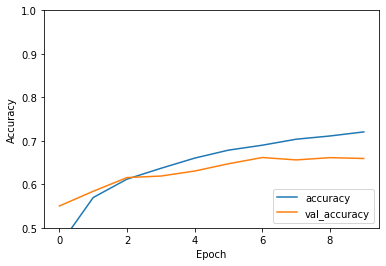

In [14]:
# 7b. Plot training vs testing accuracy

#history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [15]:
# 8. Make predictions

# If you want your model to return a probability, you can wrap the trained model, and attach 
# the softmax classifier to it:

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test[:10])# test the first 10 images
#print(predictions.shape)
predictions[0]


array([0.00172046, 0.00216011, 0.0033532 , 0.3401369 , 0.00137652,
       0.15673974, 0.17029059, 0.00135377, 0.3162373 , 0.00663144],
      dtype=float32)

In [16]:
# Apply a label and compare with the test label

print(np.argmax(predictions, axis = 1))
print(y_test[:10])


[3 8 0 0 4 6 1 6 3 9]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [ ]:
# View the first five images, to check the validity of the labels
#for i in range(5):
#    plt.subplot(1,5,i+1)
#    plt.xticks([])
#    plt.yticks([])
#    plt.grid(False)
#    plt.imshow(x_test[i])
#    plt.xlabel(class_names[y_test[i][0]])
#plt.show() 